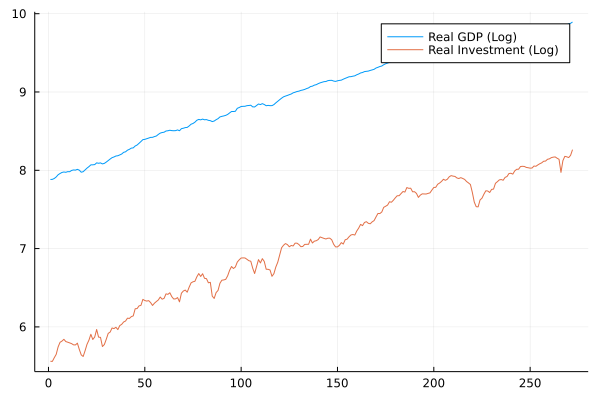

In [145]:
using HPFilter
using CSV
using DataFrames
using Plots
using StatsBase

path = "/Users/pranjal/Downloads/fredgraph.csv"
df = CSV.read("/Users/pranjal/Downloads/fredgraph.csv", DataFrame, copycols=true)

df[!, 2] = log.(df[!, 2]);
df[!, 3] = log.(df[!, 3]);

plot(df[!, 2], label = "Real GDP (Log)")
plot!(df[!, 3], label = "Real Investment (Log)")

# Without COVID

In [146]:
df_withoutCovid = df[1:264, :];
hp_trend_y = HP(df_withoutCovid[!, 2], 1600);
hp_trend_i = HP(df_withoutCovid[!, 3], 1600);
hp_cycle_y = df_withoutCovid[!, 2] - hp_trend_y;
hp_cycle_i = df_withoutCovid[!, 3] - hp_trend_i;

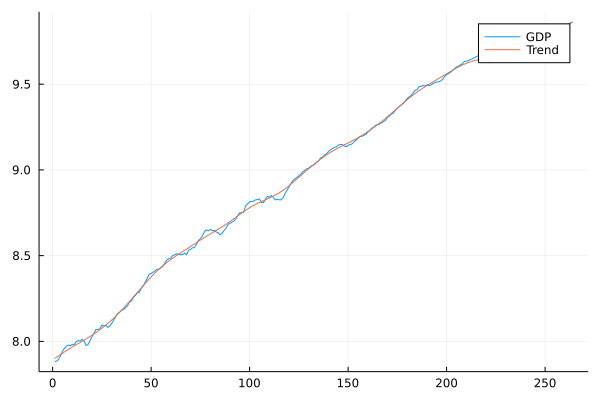

In [147]:
plot(df_withoutCovid[!, 2], label = "GDP")
plot!(hp_trend_y, label = "Trend")

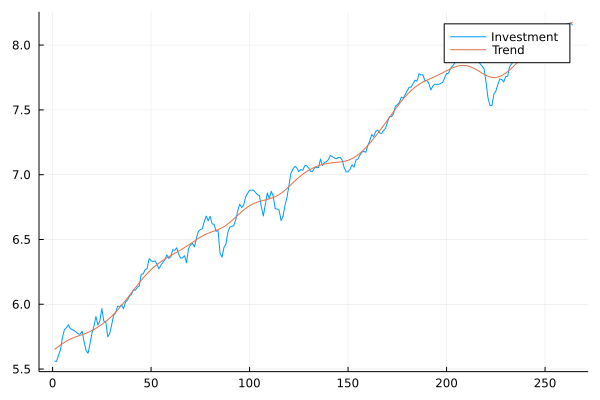

In [148]:
plot(df_withoutCovid[!, 3], label = "Investment")
plot!(hp_trend_i, label = "Trend")

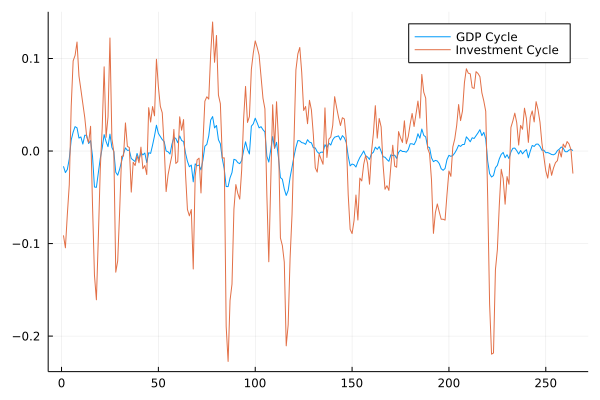

In [149]:
plot(hp_cycle_y, label = "GDP Cycle")
plot!(hp_cycle_i, label = "Investment Cycle")

In [150]:
# Standard Deviations
println(std(hp_cycle_y)*100)
println(std(hp_cycle_i)*100)

1.4751731647001396
6.6028269136225575


In [160]:
# Cross Correlations - Y with itself (-5 to +5 lags)
crosscor(hp_cycle_y,hp_cycle_y,[-5,-4,-3,-2,-1, 0, 1,2,3,4,5], demean = false)

11-element Vector{Float64}:
 -0.014686511833680043
  0.17141360524084145
  0.3922883767512189
  0.6378342291382907
  0.8523098893336447
  1.0
  0.8523098893336447
  0.6378342291382907
  0.3922883767512189
  0.17141360524084145
 -0.014686511833680043

In [159]:
# Cross Correlations - I with itself (-5 to +5 lags)
crosscor(hp_cycle_i,hp_cycle_i,[-5,-4,-3,-2,-1, 0, 1,2,3,4,5], demean = false)

11-element Vector{Float64}:
 -0.04283153851640276
  0.12837337389737122
  0.35236050814421466
  0.594114114200209
  0.8231456116432062
  1.0
  0.8231456116432062
  0.594114114200209
  0.35236050814421466
  0.12837337389737122
 -0.04283153851640276

In [162]:
# Cross Correlations - Y with I (-5 to +5 lags)
crosscor(hp_cycle_y, hp_cycle_i,[-5,-4,-3,-2,-1, 0, 1,2,3,4,5], demean = false)

11-element Vector{Float64}:
  0.08775042030508443
  0.2290386956310076
  0.40798975716118
  0.6094059086790119
  0.7902938174505413
  0.9099265691716573
  0.7616415878490689
  0.535077372152692
  0.27217772453310307
  0.03406086584774038
 -0.17488018008527326

# With Covid

In [164]:
df_withCovid = df[1:272, :];
hp_trend_y = HP(df_withCovid[!, 2], 1600);
hp_trend_i = HP(df_withCovid[!, 3], 1600);
hp_cycle_y = df_withCovid[!, 2] - hp_trend_y;
hp_cycle_i = df_withCovid[!, 3] - hp_trend_i;

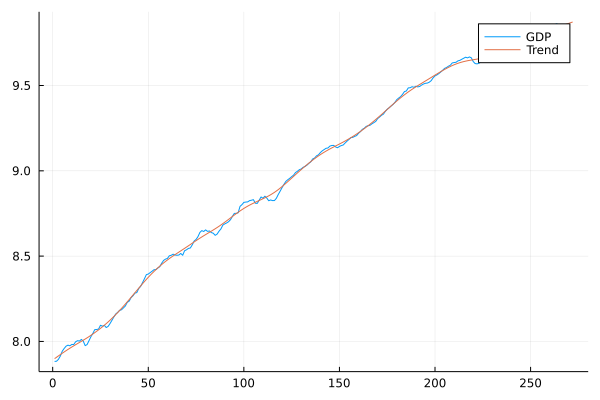

In [165]:
plot(df_withoutCovid[!, 2], label = "GDP")
plot!(hp_trend_y, label = "Trend")

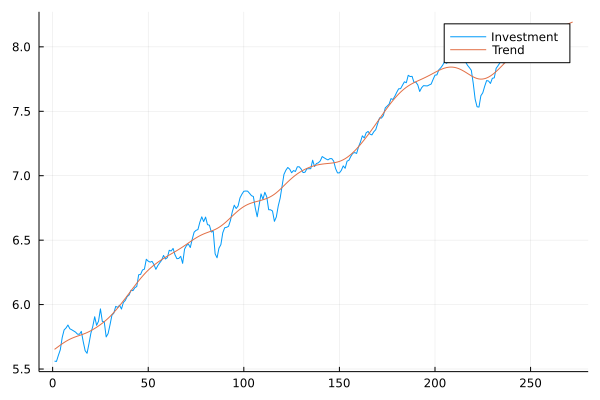

In [166]:
plot(df_withoutCovid[!, 3], label = "Investment")
plot!(hp_trend_i, label = "Trend")

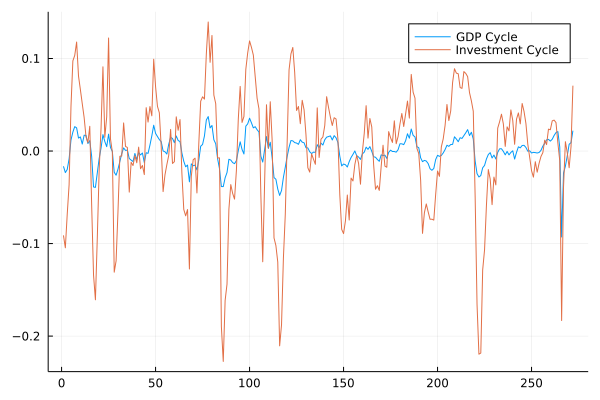

In [167]:
plot(hp_cycle_y, label = "GDP Cycle")
plot!(hp_cycle_i, label = "Investment Cycle")

In [168]:
# Standard Deviations
println(std(hp_cycle_y)*100)
println(std(hp_cycle_i)*100)

1.5966150571474012
6.62341580666417


In [171]:
# Cross Correlations - Y with itself (-5 to +5 lags)
crosscor(hp_cycle_y,hp_cycle_y,[-5,-4,-3,-2,-1, 0, 1,2,3,4,5], demean = false)

11-element Vector{Float64}:
 -0.04955420435289047
  0.10223797372450266
  0.30617381046344666
  0.5415535232109723
  0.7652599406197167
  1.0
  0.7652599406197167
  0.5415535232109723
  0.30617381046344666
  0.10223797372450266
 -0.04955420435289047

In [172]:
# Cross Correlations - I with itself (-5 to +5 lags)
crosscor(hp_cycle_i,hp_cycle_i,[-5,-4,-3,-2,-1, 0, 1,2,3,4,5], demean = false)

11-element Vector{Float64}:
 -0.05070291735490643
  0.12068089223967172
  0.3358743715546343
  0.5702279917683171
  0.8029601796551309
  1.0
  0.8029601796551309
  0.5702279917683171
  0.3358743715546343
  0.12068089223967172
 -0.05070291735490643

In [173]:
# Cross Correlations - Y with I (-5 to +5 lags)
crosscor(hp_cycle_y, hp_cycle_i,[-5,-4,-3,-2,-1, 0, 1,2,3,4,5], demean = false)

11-element Vector{Float64}:
  0.05476352098129105
  0.18812067718403264
  0.36123215491651034
  0.5588133817247413
  0.73388049660176
  0.88694413209214
  0.6974561383889358
  0.46766972813266944
  0.23137336753138804
  0.02164763492873834
 -0.17171197283853198